In [2]:
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D
from os import listdir
#from keras.utils import img_to_array
from tensorflow.keras.preprocessing.image import img_to_array

import cv2
from sklearn.model_selection import train_test_split
import numpy as np

# set random seed
np.random.seed(42)

# root folder
root_dir="C:\\Users\\user\\PycharmProjects\\pythonProject\\datasets\\new"

In [3]:
def convert_img_to_tensor(fpath):
    #read image
    img = cv2.imread(fpath)
    img = cv2.resize(img,(256,256))
    
    #converts image to array
    res = img_to_array(img)
    
    return res

def get_img_data_and_label(root_dir):
    dire=listdir(root_dir)
    
    image_dataset=[]
    image_label=[]
    classes=[]
    
    binary_label=[]
    i=0
    
    for subdir in dire:
        binary_label.append(i)
        classes.append(subdir)
        i+=1
        
    index=0
    
    for subdir in dire:
        skin_img_list=listdir(f"{root_dir}/{subdir}")
        
        for imgfile in skin_img_list:
            
            filepath=f"{root_dir}/{subdir}/{imgfile}"
            #convert image to array
            res=convert_img_to_tensor(filepath)
            #add data to dataset list
            image_dataset.append(res)
            image_label.append(binary_label[index])
            
        index+=1
        
    return image_dataset,image_label,len(binary_label),classes

In [4]:

image_dataset,image_labels,NoOfOutputLayer,classes = get_img_data_and_label(root_dir)

In [5]:
print(NoOfOutputLayer)
print(len(image_labels))
print(len(image_dataset))
print(image_dataset[0].shape)
print(classes)

3
1353
1353
(256, 256, 3)
['brown spot', 'healthy', 'leaf scald']


In [7]:
xtrain,xtest,ytrain,ytest=train_test_split(image_dataset,image_labels,test_size=0.2,random_state=2)

#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical

ytrain=to_categorical(ytrain)
ytest=to_categorical(ytest)



xtrain = np.array(xtrain, dtype=np.float16)/ 255.0
xtrain = xtrain.reshape(-1,256,256,3)
xtest = np.array(xtest, dtype=np.float16)/ 255.0
xtest = xtest.reshape(-1,256,256,3)


print(xtrain.shape)
print(ytrain.shape)


(1082, 256, 256, 3)
(1082, 3)


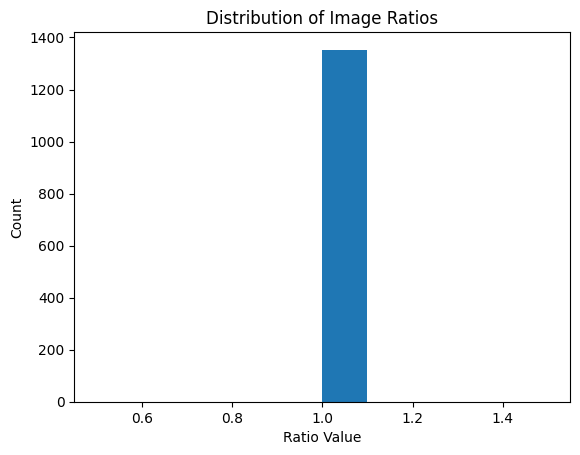

In [8]:
import matplotlib.pyplot as plt
RATIO_LIST = []
for set in (xtrain,xtest):
    for img in set:
        RATIO_LIST.append(img.shape[1]/img.shape[0])
        
plt.hist(RATIO_LIST)
plt.title('Distribution of Image Ratios')
plt.xlabel('Ratio Value')
plt.ylabel('Count')
plt.show()

In [16]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [17]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16

from tensorflow.keras.applications.resnet_v2 import ResNet101V2
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [18]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = './xtrain'
valid_path = './ytrain'


In [19]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

#resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

resnet=ResNet101V2(input_shape=IMAGE_SIZE + [3],include_top=False, weights='imagenet')




In [20]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [21]:
  # useful for getting number of output classes
folders = glob('C:\\Users\\user\\PycharmProjects\\pythonProject\\datasets\\NEW2\\')
folders

['C:\\Users\\user\\PycharmProjects\\pythonProject\\datasets\\NEW2\\']

In [22]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [23]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [24]:

# view the structure of the model
xx=model.summary()
xx

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [25]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [26]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [30]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('./xtrain',
                                                 target_size = (224, 224),
                                                 batch_size = 10,
                                                 class_mode = 'categorical')

FileNotFoundError: [WinError 3] The system cannot find the path specified: './xtrain'